# Import

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error


# Data gathering

In [224]:
diamonds = pd.read_csv('data/diamonds.csv', sep = ',')
diamonds_rick = pd.read_csv('data/rick_diamonds.csv', sep = ',')
diamonds_rick_predicted = diamonds_rick

## Data Visualization

In [77]:
print(diamonds.shape)
print(diamonds.head())
print(diamonds['price'].describe())
diamonds['clarity'].unique()

(48940, 10)
   carat        cut color clarity  depth  table  price     x     y     z
0   0.21    Premium     E     SI1   59.8   61.0    326  3.89  3.84  2.31
1   0.23       Good     E     VS1   56.9   65.0    327  4.05  4.07  2.31
2   0.29    Premium     I     VS2   62.4   58.0    334  4.20  4.23  2.63
3   0.31       Good     J     SI2   63.3   58.0    335  4.34  4.35  2.75
4   0.24  Very Good     J    VVS2   62.8   57.0    336  3.94  3.96  2.48
count    48940.000000
mean      3934.409644
std       3989.333861
min        326.000000
25%        949.000000
50%       2401.000000
75%       5331.250000
max      18823.000000
Name: price, dtype: float64


array(['SI1', 'VS1', 'VS2', 'SI2', 'VVS2', 'VVS1', 'I1', 'IF'],
      dtype=object)

In [95]:
print(diamonds_rick.head())
print(diamonds_rick['clarity'].unique())

   carat        cut color clarity  depth  table     x     y     z  \
0   0.91  Very Good     H     SI2   63.4   57.0  6.10  6.18  3.89   
1   0.38       Good     F     VS2   60.3   61.0  4.68  4.71  2.83   
2   0.52      Ideal     H     VS2   61.8   56.0  5.19  5.16  3.20   
3   1.10      Ideal     G     VS1   61.3   56.0  6.65  6.69  4.09   
4   2.28      Ideal     G     SI2   61.6   57.0  8.44  8.37  5.18   

   price_predicted  
0                0  
1                0  
2                0  
3                0  
4                0  
['SI2' 'VS2' 'VS1' 'SI1' 'IF' 'VVS2' 'I1' 'VVS1']


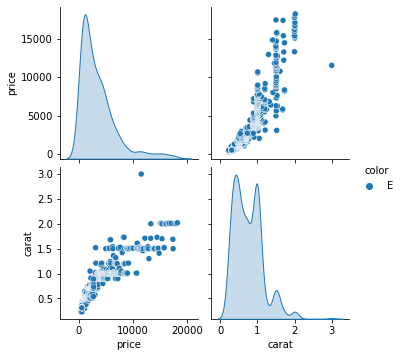

In [53]:
sns.pairplot(diamonds[(diamonds['cut']=='Good')&(diamonds['color']=='E')][['price','carat','color']], hue = 'color')

# Data cleaning

In [225]:
diamonds_clean = diamonds
diamonds_clean['cut_value'] = 0
diamonds_clean

,carat,cut,color,clarity,depth,table,price,x,y,z,cut_value
0,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31,0
1,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31,0
2,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63,0
3,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75,0
4,0.24,Very Good,J,VVS2,62.8,57.0,336,3.94,3.96,2.48,0
...,...,...,...,...,...,...,...,...,...,...,...
48935,0.72,Premium,D,SI1,62.7,59.0,2757,5.69,5.73,3.58,0
48936,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50,0
48937,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61,0
48938,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56,0


## Group Categories

### cut

In [230]:
diamonds_clean.loc[diamonds_clean['cut']=='I1','cut_value'] = 0
diamonds_clean.loc[diamonds_clean['cut']!='Fair','cut_value'] = 1
diamonds_rick_predicted.loc[diamonds_clean['cut']=='Fair','cut_value'] = 0
diamonds_rick_predicted.loc[diamonds_clean['cut']!='Fair','cut_value'] = 1

### Clarity

In [252]:
diamonds_clean.loc[diamonds_clean['clarity']=='I1','clarity_value'] = 0
diamonds_clean.loc[diamonds_clean['clarity']!='I1','clarity_value'] = 1
diamonds_rick_predicted.loc[diamonds_clean['clarity']=='I1','clarity_value'] = 0
diamonds_rick_predicted.loc[diamonds_clean['clarity']!='I1','clarity_value'] = 1

# Price prediction

In [254]:
#'E', 'I', 'J', 'H', 'F', 'G', 'D'
#'Premium', 'Good', 'Very Good', 'Ideal', 'Fair'
#'SI1', 'VS1', 'VS2', 'SI2', 'VVS2', 'VVS1', 'I1', 'IF'
model = LinearRegression()
diamonds_rick_predicted['price_predicted'] = 0
for clarity in diamonds['clarity_value'].unique():
    for color in diamonds['color'].unique():
        for cut in diamonds['cut_value'].unique():
            X = diamonds[(diamonds['clarity_value']==clarity)&(diamonds['color']==color)&(diamonds['cut_value']==cut)][['carat','table','depth']]
            y = diamonds[(diamonds['clarity_value']==clarity)&(diamonds['color']==color)&(diamonds['cut_value']==cut)]['price']
            model.fit(X,y)
            print(f'Modelo {clarity},{color},{cut}:{model.score(X,y)}')
            try:
                X_rick = diamonds_rick_predicted[(diamonds_rick_predicted['clarity_value']==clarity)&(diamonds_rick_predicted['color']==color)&(diamonds_rick_predicted['cut_value']==cut)][['carat','table','depth']]
                y_pred = model.predict(X_rick)
                diamonds_rick_predicted.loc[(diamonds_rick_predicted['clarity_value']==clarity)&(diamonds_rick_predicted['color']==color)&(diamonds_rick_predicted['cut_value']==cut),'price_predicted'] = y_pred
            except:
                None
            

Modelo 1.0,E,1:0.8542925228622258
Modelo 1.0,E,0:0.8425146480936369
Modelo 1.0,I,1:0.9255780332142448
Modelo 1.0,I,0:0.9223025250788085
Modelo 1.0,J,1:0.9347594668884656
Modelo 1.0,J,0:0.9305434602983931
Modelo 1.0,H,1:0.9167892674071598
Modelo 1.0,H,0:0.9013190174517098
Modelo 1.0,F,1:0.856268954723799
Modelo 1.0,F,0:0.8373331497673464
Modelo 1.0,G,1:0.8902605953040754
Modelo 1.0,G,0:0.8644653821409317
Modelo 1.0,D,1:0.8273444403646564
Modelo 1.0,D,0:0.8115276687575699
Modelo 0.0,E,1:0.923110620849698
Modelo 0.0,E,0:0.7275997384692936
Modelo 0.0,I,1:0.9552079527583331
Modelo 0.0,I,0:0.9618258925679164
Modelo 0.0,J,1:0.9377912150319438
Modelo 0.0,J,0:0.9566297333252246
Modelo 0.0,H,1:0.8703195919256572
Modelo 0.0,H,0:0.9103034209970153
Modelo 0.0,F,1:0.9269339173196196
Modelo 0.0,F,0:0.960073631135497
Modelo 0.0,G,1:0.9073938010513712
Modelo 0.0,G,0:0.9789903741423369
Modelo 0.0,D,1:0.9598688549997981
Modelo 0.0,D,0:1.0


In [258]:
diamonds_rick_predicted[diamonds_rick_predicted['price_predicted']==0]

,carat,cut,color,clarity,depth,table,x,y,z,price_predicted,cut_value,clarity_value


In [186]:
X.shape

(3, 3)

# Saving the csv

In [259]:
diamonds_rick_predicted.to_csv('diamonds_rick_predicted.csv')

# Notes

## Price predicted

1 - Price predicted as the mean of prices from diamonds.csv(3980)

2 - Price predicted using carat as the only variable from diamonds.csv(1605)

3 - Price predicted using carat and depth variables from diamonds.csv(1598)

Price predicted using carat and table variables from diamonds.csv(1595)

Price predicted using carat,table and depth variables from diamonds.csv(1583)

Price predicted using carat,table,depth and clarity variables from diamonds.csv(1217); Cut does not seen to influence the model

Price predicted using carat,table,depth, clarity and color variables from diamonds.csv(987); Cut does not seen to influence the model

Tryed to group cut and clarity and got a worse score(1625)